In [1]:
from matplotlib import pyplot as plt

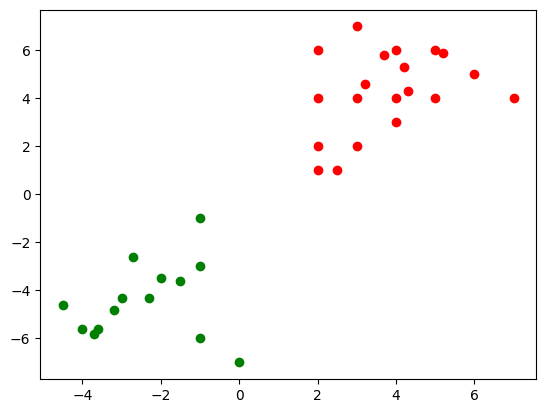

In [2]:
class1 = [(2, 4), (2, 6), (2, 1), (2.5, 1), (3, 4), (4, 4), (5, 6), (2, 2), (3, 2), (4.2, 5.3), (4, 3), (6, 5), (4, 6), (3.7, 5.8), (3.2, 4.6), (5.2, 5.9), (5, 4), (7, 4), (3, 7), (4.3, 4.3)]
class2 = [(0, -7), (-1, -1), (-1, -3), (-2, -3.5), (-1, -6), (-3, -4.3), (-4, -5.6), (-3.2, -4.8), (-2.3, -4.3), (-2.7, -2.6), (-1.5, -3.6), (-3.6, -5.6), (-4.5, -4.6), (-3.7, -5.8)]

X, Y = zip(*class1)
plt.scatter(X, Y, c = "r")

X, Y = zip(*class2)
plt.scatter(X, Y, c = "g")

In [3]:
import numpy as np
from collections import Counter

In [17]:
class Perceptron:
    def __init__(self, input_length, weights=None):
        if weights is None:
            self.weights = np.random.rand(input_length) * 2 - 1
        else:
            self.weights = weights
        self.learning_rate = 0.1

    @staticmethod
    def unit_step_function(x):
        return 1 if x >= 0 else 0

    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)

    def adjust(self, target_result, calculated_result, in_data):
        error = target_result - calculated_result
        for i in range(len(in_data)):
            correction = error * in_data[i] * self.learning_rate
            self.weights[i] += correction

In [18]:
from itertools import chain

In [19]:
p = Perceptron(2)

for point in class1:
    p.adjust(1, p(point), point)

for point in class2:
    p.adjust(0, p(point), point)

evaluation = Counter()

for point in chain(class1, class2):
    if p(point) == 1:
        evaluation["class1"] += 1
    else:
        evaluation["class2"] += 1

testpoints = [(3.9, 6.9), (-2.9, -5.9)]

for point in testpoints:
    print(p(point))

print(evaluation.most_common())

1
0
[('class1', 20), ('class2', 14)]


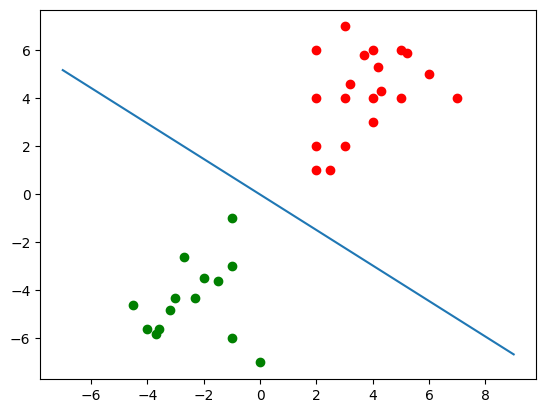

In [20]:
X, Y = zip(*class1)
plt.scatter(X, Y, c="r")

X, Y = zip(*class2)
plt.scatter(X, Y, c="g")

x = np.arange(-7, 10)
y = 5*x + 10
m = -p.weights[0] / p.weights[1]

plt.plot(x, m*x)
plt.show()